In [ ]:
# 241106

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from glob import glob
import os

df_merg = pd.read_csv(r"../0_data/model_info.csv", index_col=0)
df_high = df_merg[df_merg['High'] == True]
model_list = df_high.index.tolist()
df_sum = pd.DataFrame()
score_path = r'../2_analyze/.detailed/score'
lang = 'eng'
plot_path = ".plot"
os.makedirs(plot_path, exist_ok=True)

for model in model_list:
    model_path = glob(f"{score_path}/{model}*{lang}*.csv")[0]
    df_temp = pd.read_csv(model_path, index_col=0)
    
    if df_sum.empty:
        df_sum = df_temp
    else:
        df_sum += df_temp
# df_sum

In [ ]:
path = r'../0_data/exam_origin.json'
with open(path, 'r') as f:
    data = json.load(f)

def norm_question_number(ques_num, subject_id):
    if   subject_id == '1-1': ques_num -= 0
    elif subject_id == '1-2': ques_num -= 20
    elif subject_id == '1-3': ques_num -= 40
    elif subject_id == '1-4': ques_num -= 60
    elif subject_id == '1-5': ques_num -= 80
    elif subject_id == '2-1': ques_num -= 0
    elif subject_id == '2-2': ques_num -= 18
    elif subject_id == '2-3': ques_num -= 36
    elif subject_id == '2-4': ques_num -= 54
    elif subject_id == '2-5': ques_num -= 72
    elif subject_id == '3-1': ques_num -= 0
    elif subject_id == '3-2': ques_num -= 0
    elif subject_id == '3-3': ques_num -= 27
    elif subject_id == '3-4': ques_num -= 45
    elif subject_id == '4-1': ques_num -= 63
    return ques_num

df_filter = pd.DataFrame()
for i in range(len(data)):
    year = data[i]['year']
    subject_id = data[i]['subject_id']
    question_number = data[i]['question_number']
    question_text = data[i]['question_text']
    idx = norm_question_number(question_number, subject_id)
    column_name = f"{year}_{subject_id}"
    if "<자료(비공개)>" in question_text:
        value = 1
    else:
        value = 0
    df_filter.loc[idx, column_name] = value
# df_filter

In [ ]:
def plot(df_sum, suffix):
    frequency_df = df_sum.apply(pd.Series.value_counts).fillna(0).astype(int)
    grouped_columns = frequency_df.T.groupby(df_sum.columns.str.split('_').str[-1]).sum().T

    bins = [0, 4, 8, 12]
    labels = ['Hard', 'Medium', 'Easy']

    grouped_by_index_range = grouped_columns.groupby(pd.cut(grouped_columns.index, bins=bins, labels=labels), observed=False).sum()
    grouped_by_index_range_ratio = grouped_by_index_range.div(grouped_by_index_range.sum(axis=0), axis=1)*100
    grouped_by_index_range_ratio

    colors = colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.45, 3))
    grouped_by_index_range_ratio.T.plot(kind='bar', stacked=True, figsize=(8, 4), color=colors)
    # plt.title('Difficulty of Questions by Subject')
    plt.xticks(rotation=0)
    plt.xlabel('Subject')
    plt.ylim(0, 100)
    plt.ylabel('Proportion (%)')
    plt.legend(title='Subject')
    plt.savefig(f"{plot_path}/5-difficulty_{suffix}.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    #######################
    # def custom_autopct(pct):
    #     return ('%.1f%%' % pct) if pct > 5 else ''
    # colors = plt.get_cmap('Set3')(np.linspace(0, 1, 12))
    # additional_colors = plt.get_cmap('Pastel2')(np.linspace(0.3, 1, 8))
    # extended_colors = np.concatenate([colors, additional_colors], axis=0)
    # grouped_by_index_range_ratio.loc['Hard'].plot(
    #     kind='pie', 
    #     autopct=custom_autopct, 
    #     startangle=90, 
    #     counterclock=False, 
    #     figsize=(6, 6), 
    #     wedgeprops={'width': 0.3}, 
    #     colors=extended_colors,
    #     labeldistance=1.05
    # )
    # plt.axis('equal')
    # # plt.title('Proportion of Hard Questions by Subject')
    # plt.ylabel('')
    # plt.savefig(f"{plot_path}/5-difficulty_pie_{suffix}.pdf", format='pdf', bbox_inches='tight')
    # plt.show()

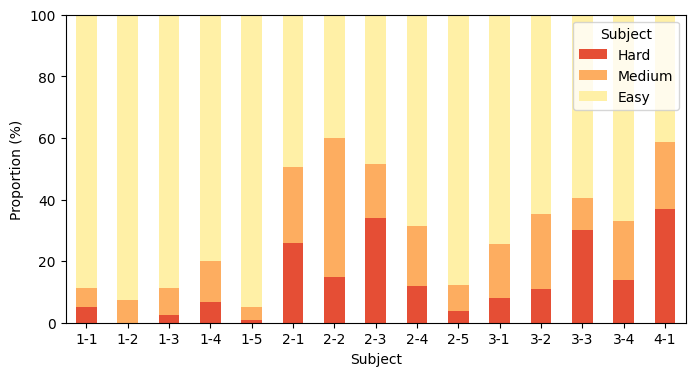

In [ ]:
df_sum_non = df_sum.where(df_filter == 0)
df_sum_cen = df_sum.where(df_filter == 1)

# plot(df_sum)
plot(df_sum_non, "non")
# plot(df_sum_cen, "cen")

In [ ]:
def plot_big(df_sum):
    frequency_df = df_sum.apply(pd.Series.value_counts).fillna(0).astype(int)
    grouped_columns = frequency_df.T.groupby(df_sum.columns.str.split('_').str[-1]).sum().T

    bins = [0, 4, 8, 12]
    labels = ['Hard', 'Medium', 'Easy']

    grouped_by_index_range = grouped_columns.groupby(pd.cut(grouped_columns.index, bins=bins, labels=labels), observed=False).sum()
    grouped_by_index_range_ratio = grouped_by_index_range.div(grouped_by_index_range.sum(axis=0), axis=1)*100
    if True:
        temp = grouped_by_index_range_ratio.T
        temp['subject_id_first'] = temp.index.str[0]
        temp = temp.groupby('subject_id_first').sum()
        temp = temp.div(temp.sum(axis=1), axis=0)*100
        grouped_by_index_range_ratio = temp.T
    ########################
    colors = colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.45, 3))
    grouped_by_index_range_ratio.T.plot(kind='bar', stacked=True, figsize=(4, 4), color=colors)
    # plt.title('Difficulty of Questions by Subject')
    plt.xticks(rotation=0)
    plt.xlabel('Subject')
    plt.ylabel('Proportion (%)')
    plt.ylim(0, 100)
    # plt.legend(title='Subject')
    plt.savefig(f"{plot_path}/5-difficulty_whole.pdf", format='pdf', bbox_inches='tight')
    plt.show()

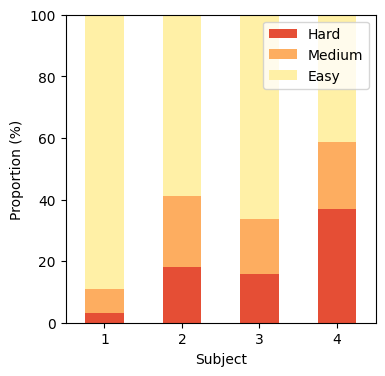

In [6]:
plot_big(df_sum_non)

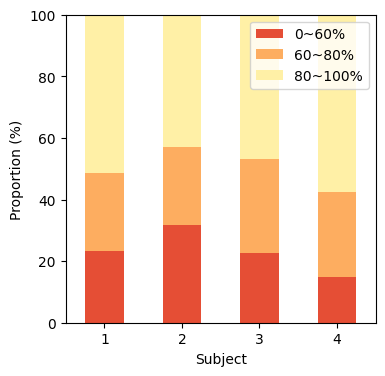

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 입력
data = {
    "0~60%": [23.2, 31.7, 22.7, 15.0],
    "60~80%": [25.5, 25.4, 30.6, 27.5],
    "80~100%": [51.3, 43.0, 46.7, 57.5]
}

df = pd.DataFrame(data, index=[1, 2, 3, 4])
colors = colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.45, 3))
df.plot(kind="bar", stacked=True, figsize=(4, 4), color=colors)

plt.xlabel('Subject')
plt.ylabel('Proportion (%)')
plt.ylim(0, 100)

plt.xticks(rotation=0)
plt.savefig(f"{plot_path}/5-difficulty_whole_ref.pdf", format='pdf', bbox_inches='tight')
plt.show()


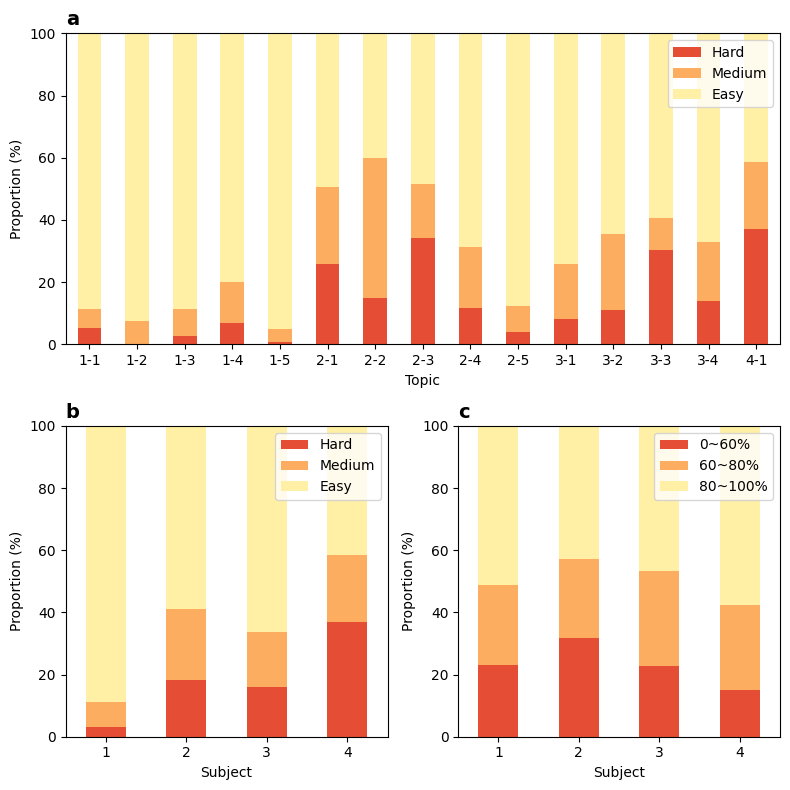

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])
fig.subplots_adjust(hspace=0.3, wspace=0.3)

colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.45, 3))
bins = [0, 4, 8, 12]
labels = ['Hard', 'Medium', 'Easy']

# ---- (a) ----
ax_a = fig.add_subplot(gs[0, :])
frequency_df = df_sum_non.apply(pd.Series.value_counts).fillna(0).astype(int)
grouped_columns = frequency_df.T.groupby(df_sum_non.columns.str.split('_').str[-1]).sum().T
grouped_by_index_range = grouped_columns.groupby(pd.cut(grouped_columns.index, bins=bins, labels=labels), observed=False).sum()
grouped_by_index_range_ratio = grouped_by_index_range.div(grouped_by_index_range.sum(axis=0), axis=1)*100
grouped_by_index_range_ratio.T.plot(kind='bar', stacked=True, color=colors, ax=ax_a)
ax_a.set_xlabel('Topic')
ax_a.set_ylabel('Proportion (%)')
ax_a.set_ylim(0, 100)
ax_a.set_xticklabels(ax_a.get_xticklabels(), rotation=0)
ax_a.set_title("a", loc='left', fontsize=14, fontweight='bold')
ax_a.legend(loc='upper right')

# ---- (b) ----
ax_b = fig.add_subplot(gs[1, 0])
frequency_df = df_sum_non.apply(pd.Series.value_counts).fillna(0).astype(int)
grouped_columns = frequency_df.T.groupby(df_sum_non.columns.str.split('_').str[-1]).sum().T
grouped_by_index_range = grouped_columns.groupby(pd.cut(grouped_columns.index, bins=bins, labels=labels), observed=False).sum()
grouped_by_index_range_ratio = grouped_by_index_range.div(grouped_by_index_range.sum(axis=0), axis=1)*100
temp = grouped_by_index_range_ratio.T
temp['subject_id_first'] = temp.index.str[0]
temp = temp.groupby('subject_id_first').sum()
temp = temp.div(temp.sum(axis=1), axis=0)*100
grouped_by_index_range_ratio = temp.T
grouped_by_index_range_ratio.T.plot(kind='bar', stacked=True, color=colors, ax=ax_b)
ax_b.set_xlabel('Subject')
ax_b.set_ylabel('Proportion (%)')
ax_b.set_ylim(0, 100)
ax_b.set_xticklabels(ax_b.get_xticklabels(), rotation=0)
ax_b.set_title("b", loc='left', fontsize=14, fontweight='bold')

# ---- (c) ----
ax_c = fig.add_subplot(gs[1, 1])
data = {
    "0~60%": [23.2, 31.7, 22.7, 15.0],
    "60~80%": [25.5, 25.4, 30.6, 27.5],
    "80~100%": [51.3, 43.0, 46.7, 57.5]
}
df = pd.DataFrame(data, index=[1, 2, 3, 4])
df.plot(kind="bar", stacked=True, color=colors, ax=ax_c)
ax_c.set_xlabel('Subject')
ax_c.set_ylabel('Proportion (%)')
ax_c.set_ylim(0, 100)
ax_c.set_xticklabels(ax_c.get_xticklabels(), rotation=0)
ax_c.set_title("c", loc='left', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f"{plot_path}/5-combined.pdf", format='pdf', bbox_inches='tight')
plt.show()
